In [2]:
import fssa
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from scipy.optimize import curve_fit
import matplotlib.colors as colors
from numpy import polyfit, poly1d
from scipy.interpolate import interp1d
import glob
from scipy import signal


In [3]:
#24 sites
file_name = '2023_01_2*L24.npy' 
data = []
data_path = glob.glob(('C:/Users/wangy/Rydberg simulation/rydberg_data/1_26_23/'+file_name))
data_path

['C:/Users/wangy/Rydberg simulation/rydberg_data/1_26_23\\2023_01_26_13_08_19_186L24.npy',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/1_26_23\\2023_01_26_13_08_19_638L24.npy',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/1_26_23\\2023_01_26_13_08_19_824L24.npy',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/1_26_23\\2023_01_26_13_08_20_470L24.npy',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/1_26_23\\2023_01_26_13_08_20_771L24.npy',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/1_26_23\\2023_01_26_13_53_40_356L24.npy',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/1_26_23\\2023_01_26_14_34_19_333L24.npy',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/1_26_23\\2023_01_26_14_41_46_263L24.npy']

In [4]:
for path in data_path:
    data.append(np.load(path,allow_pickle=True).tolist())

In [5]:
selected_data = []
for i in range(len(data)):
    if data[i]['params']['Omega']== 1.5 and len(data[i]['nT'])>100: #and np.array(data[i]['nT'])[:,3][-1]>4.5:
        selected_data.append(data[i])
# # del selected_data[1] #get rid of the uncompleted data
# # del selected_data[-1] #get rid of the uncompleted data

selected_data = sorted(selected_data, key=lambda selected_data: selected_data['params']['Omega'])   # sort by age

N = []
t = []
detuning = [] 
rabi = [] 
E = [] 
overlap = []
z_list = []
zz_list = []
zg_list = []
zzg_list = []
for i in range(len(selected_data)):
    N.append(selected_data[i]['params']['L'])
    t.append(np.array(selected_data[i]['nT'])[:,1]) # scan time
    detuning.append(np.array(selected_data[i]['nT'])[:,3]) # detuning
    rabi.append(np.array(selected_data[i]['nT'])[:,2]) # Rabi
    E.append(np.array(selected_data[i]['E'])) # energy for the lowest three states
    overlap.append(np.array(selected_data[i]['overlap']))# overlap with fm, afm, ground state, 1st excited state, 2nd excited state
    z_list.append(np.array(selected_data[i]['z'])) # rydberg population  
    zz_list.append(np.array(selected_data[i]['zz']))# correlation of the rydbegrg population
    zg_list.append(np.array(selected_data[i]['zg']))# rydberg population for the ground state
    zzg_list.append(np.array(selected_data[i]['zzg']))# correlation of the rydberg population for the ground state
    print('i',i)
    print('Omega',selected_data[i]['params']['U'])
    print(zzg_list[i].shape)

i 0
Omega 8.0
(174, 24, 24)


[[ 0.         -5.          5.        ]
 [ 0.1        -5.          5.0006029 ]
 [ 0.2        -5.          5.00240884]
 [ 0.3        -5.          5.00542131]
 [ 0.4        -5.          5.00963364]
 [ 0.5        -5.          5.0150301 ]
 [ 0.6        -5.          5.02162082]
 [ 0.7        -5.          5.02937126]
 [ 0.8        -5.          5.03827696]
 [ 0.9        -5.          5.04831967]
 [ 1.         -5.          5.05948854]
 [ 1.1        -5.          5.07176809]
 [ 1.2        -5.          5.08514315]
 [ 1.3        -5.          5.09960611]
 [ 1.4        -5.          5.11512152]
 [ 1.5        -5.          5.13168825]
 [ 1.6        -5.          5.1492791 ]
 [ 1.7        -5.          5.16787059]
 [ 1.8        -5.          5.18744009]
 [ 1.9        -5.          5.20796852]
 [ 2.         -5.          5.22943206]
 [ 2.052      -4.16176334  4.43377081]
 [ 2.104      -3.50261872  3.8194433 ]
 [ 2.156      -2.97071033  3.33411684]
 [ 2.208      -2.53243987  2.94363098]
 [ 2.26       -2.16508147

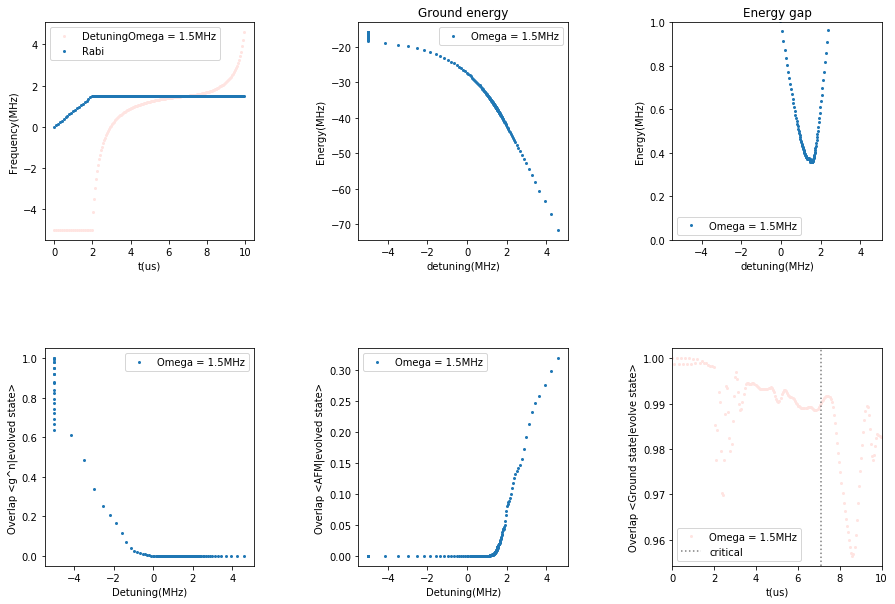

In [6]:
ms = 2
ls = ''
fig, ax = plt.subplots(2, 3, figsize=(15,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
color_list = ['mistyrose', 'salmon','red','brown','black']
for i in range(len(N)):
    label0 ='Omega = '+ str((selected_data[i]['params']['Omega']))+'MHz'
    ax[0,0].plot(t[i],detuning[i],marker='o',markersize = ms,ls = ls,label = 'Detuning'+label0 ,color = color_list[i])
    print(np.array([t[i],detuning[i],(E[i][:,2]-E[i][:,0])/2/np.pi]).T)
    ax[0,1].plot(detuning[i],(E[i][:,0])/2/np.pi,marker='o',markersize = ms,ls = ls,label= label0)
    ax[0,2].plot(detuning[i],(E[i][:,2]-E[i][:,0])/2/np.pi,marker='o',markersize = ms,ls = ls,label= label0)
    print(np.array([detuning[i],(E[i][:,2]-E[i][:,0])/2/np.pi]).T)
    ax[1,0].plot(detuning[i],overlap[i][:,0],marker='o',markersize = ms,ls = ls,label= label0)
    ax[1,1].plot(detuning[i],overlap[i][:,1],marker='o',markersize = ms,ls = ls,label= label0)
    ax[1,2].plot(t[i],overlap[i][:,2]+overlap[i][:,3],marker='o',markersize = ms,ls = ls,label= label0,color = color_list[i])
    #ax[1,2].plot(t[i],overlap[i][:,4],marker='o',markersize = ms,ls = ls,label= label0+'2nd excited',color = color_list[i])
ax[0,0].plot(t[i],rabi[i],marker='o',markersize = ms,ls = ls,label = 'Rabi')

ax[1,2].set_xlim([0,10])


ax[1,2].axvline(7.1,color = 'grey',ls = ':',label ='critical')
ax[0,0].set_xlabel('t(us)')
ax[0,0].set_ylabel('Frequency(MHz)')
#ax[0,0].set_title('Rabi or Detuning')
ax[0,0].legend()
ax[0,1].set_ylabel('Energy(MHz)')
ax[0,1].set_xlabel('detuning(MHz)')
ax[0,1].set_title('Ground energy')
ax[0,1].legend()
ax[0,2].set_ylabel('Energy(MHz)')
ax[0,2].set_xlabel('detuning(MHz)')
ax[0,2].set_title('Energy gap')
ax[0,2].set_ylim([0,1])
ax[0,2].legend()
ax[1,0].set_xlabel('Detuning(MHz)')
ax[1,0].set_ylabel('Overlap <g^n|evolved state>')
ax[1,0].legend()
ax[1,1].set_xlabel('Detuning(MHz)')
ax[1,1].set_ylabel('Overlap <AFM|evolved state>')
ax[1,1].legend()
ax[1,2].set_xlabel('t(us)')
ax[1,2].set_ylabel('Overlap <Ground state|evolve state>')
ax[1,2].legend()



i = 0
Omega = 1MHz
intial_detuning-5.0
intial_gap5.0000000000000036
crit_id  121
crit_t7.251999999999977
crit_detuning1.534322746561656
crit_gap0.35495897697775664
final_detuning4.596548393562964
final_gap3.0197136475142172


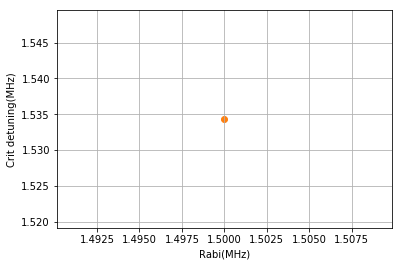

In [6]:
crit_id_list = []
for i in range(len(N)):
    print('i =',i)
    label0 ='Omega = '+ str(int(selected_data[i]['params']['Omega']))+'MHz'

    print(label0)
  #  print(np.array([gap,detuning[i]])
    gap = (E[i][:,2]-E[i][:,0])/2/np.pi
    crit_id = np.argmin(gap)
   # crit_id = np.argmin(abs(detuning[i]-(selected_data[i]['params']['Delta_crit'])))
    crit_id_list.append(crit_id)
    print('intial_detuning'+str(detuning[i][0]))
    print('intial_gap'+str(gap[0]))
    print('crit_id ', crit_id)
    print('crit_t'+str(t[i][crit_id]))
    print('crit_detuning'+str(detuning[i][crit_id]))
    print('crit_gap'+str(gap[crit_id]))
    print('final_detuning'+str(detuning[i][-1]))
    print('final_gap'+str(gap[-1]))
    plt.scatter(selected_data[i]['params']['Omega'],detuning[i][crit_id],color = 'C1')
plt.xlabel('Rabi(MHz)')
plt.ylabel('Crit detuning(MHz)')
plt.grid(which = 'both')
          
    

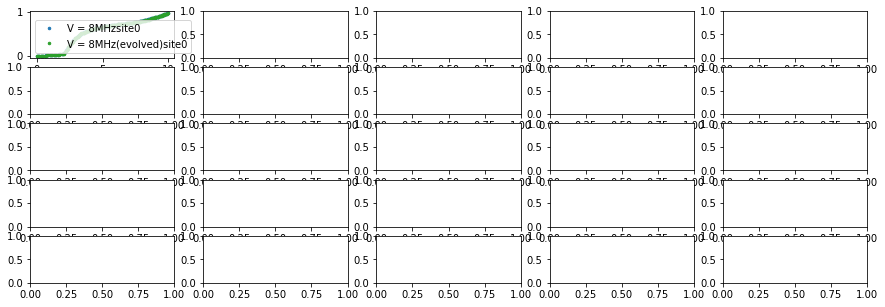

In [7]:
# rydberg state correlation with site m

m = 0
ms = 5
fig, ax = plt.subplots(5,5, figsize=(15,5)) 
for j_n, j in enumerate(range(len(N))):
    label0 ='V = '+ str(int(selected_data[j]['params']['U']))+'MHz'
    ax[j//5,j%5].plot(t[j],zg_list[j][:,0]+zg_list[j][:,1],markersize = ms,marker='.',color = 'C%d'%j_n,ls = '',label= label0+'site0')        
    ax[j//5,j%5].plot(t[j],z_list[j][:,0]+z_list[j][:,1],markersize = ms,marker='.',color = 'C%d'%(j_n+2),ls = '',label= label0+'(evolved)'+'site0')
        

       # ax[i//5,i%5].set_ylim([-0.1,1])
    ax[j//5,j%5].legend()

In [8]:
range(len(N))

range(0, 1)

In [9]:
sigma_1_list = []
sigma_2_list = []
x_list = []
for i in range(len(N)):
    sigma1 = [] # single body sigma field
    sigma2 = [] # correlation of sigma field
    # do something
    sign = np.ones(N[i])
    sign[0::2]=-1
    x_temp = np.arange(N[i])
    x_list.append(x_temp)
    for t_index in range(len(selected_data[i]['zz'])):
        n_temp = np.array(selected_data[i]['z'])[t_index] # rydberg population at time t
        n_temp_mean = np.mean(n_temp)
        nn_temp = np.array(selected_data[i]['zz'])[t_index]
        sigma_temp = (n_temp[:]-n_temp_mean)*sign
        sigma1.append(sigma_temp)
        
        for x in x_temp:
            temp_g = (-1)**x *(nn_temp[0,x]-n_temp_mean*n_temp[0]-n_temp_mean*n_temp[x]+n_temp_mean**2)
            sigma2.append(temp_g)
    sigma2 = np.array(sigma2)
    sigma2 = sigma2.reshape(len(selected_data[i]['zg']),N[i])
    sigma_1_list.append(sigma1)   
    sigma_2_list.append(sigma2)
sigma_1_g_list = []
sigma_2_g_list = []
x_list = []
for i in range(len(N)):
    sigma1_g = [] # single body sigma field
    sigma2_g = [] # correlation of sigma field
    # do something
    sign = np.ones(N[i])
    sign[0::2]=-1
    x_temp = np.arange(N[i])
    x_list.append(x_temp)
    for t_index in range(len(selected_data[i]['zg'])):
        n_temp = np.array(selected_data[i]['zg'])[t_index] # rydberg population at time t
        n_temp_mean = np.mean(n_temp)
        nn_temp = np.array(selected_data[i]['zzg'])[t_index]
        sigma_temp = (n_temp[:]-n_temp_mean)*sign
        sigma1_g.append(sigma_temp)
        for x in x_temp:
            temp_g = (-1)**x *(nn_temp[0,x]-n_temp_mean*n_temp[0]-n_temp_mean*n_temp[x]+n_temp_mean**2)
            sigma2_g.append(temp_g)
    sigma2_g = np.array(sigma2_g)
    sigma2_g = sigma2_g.reshape(len(selected_data[i]['zg']),N[i])
    sigma_1_g_list.append(sigma1_g)   
    sigma_2_g_list.append(sigma2_g)
    

In [10]:
t[0][121],detuning[0][121],sigma2[121],sigma2_g[121]  #time, crit detuning, correlator for evolved state and ground state

(7.251999999999977,
 1.534322746561656,
 array([0.23413382, 0.13681864, 0.1197512 , 0.10592087, 0.10092616,
        0.09628407, 0.09330087, 0.08959555, 0.08745762, 0.08490994,
        0.0832475 , 0.0824598 , 0.08274878, 0.08265454, 0.08376393,
        0.08409202, 0.08693335, 0.08940628, 0.09308209, 0.09607872,
        0.10111241, 0.10613772, 0.11968809, 0.13529375]),
 array([0.23480023, 0.13646876, 0.11961898, 0.10568712, 0.09951087,
        0.09341641, 0.09018322, 0.08682961, 0.08508014, 0.08318626,
        0.08243383, 0.0815345 , 0.08160789, 0.08153454, 0.08243387,
        0.0831864 , 0.08508023, 0.08682984, 0.09018341, 0.09341657,
        0.09951094, 0.10568723, 0.119619  , 0.13646883]))

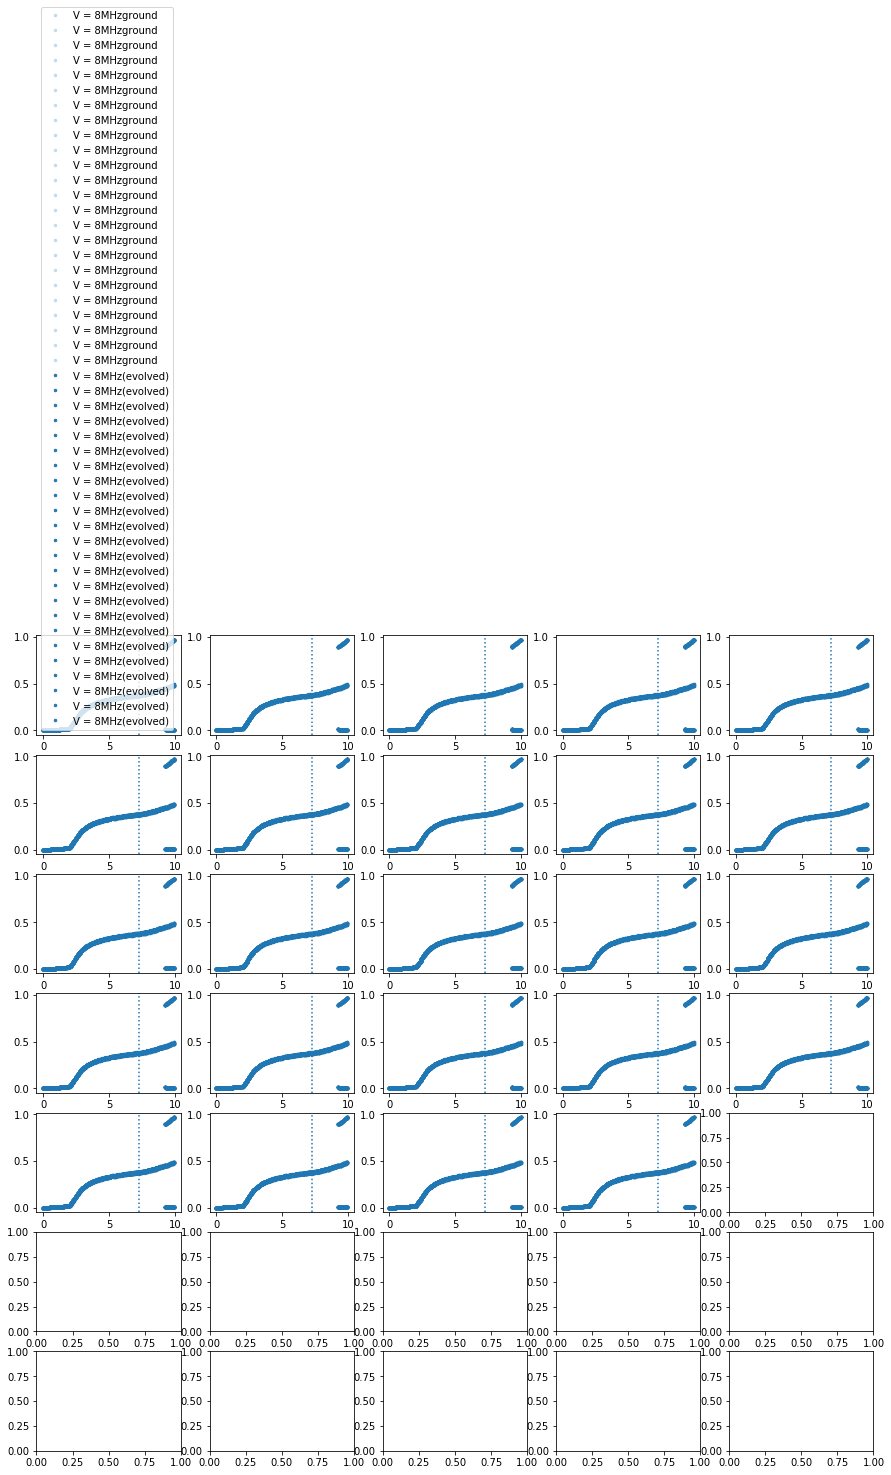

In [11]:
# rydberg state correlation with site m

m = 0
ms = 5
fig, ax = plt.subplots(7, 5, figsize=(15,15))

for j_n, j in enumerate(range(len(N))):
    for i in range(N[j]):
#         print(t[j])
#         print(zzg_list[j][:,m,i])
        label0 ='V = '+ str(int(selected_data[j]['params']['U']))+'MHz'
        mean = np.mean(z_list[j][:],axis = 1)
        mean_g = np.mean(zg_list[j][:],axis = 1)
        ax[i//5,i%5].axvline(t[j][crit_id_list[j]],markersize = ms,ls = ':',color = 'C%d'%j_n)
        ax[i//5,i%5].plot(t[j],z_list[j][:],markersize = ms,marker='.',color = 'C%d'%j_n,ls = '',label= label0+'ground',alpha = 0.2)        
        ax[i//5,i%5].plot(t[j],zg_list[j][:],markersize = ms,marker='.',color = 'C%d'%j_n,ls = '',label= label0+'(evolved)')
        

       # ax[i//5,i%5].set_ylim([-0.1,1])
    ax[0,0].legend()

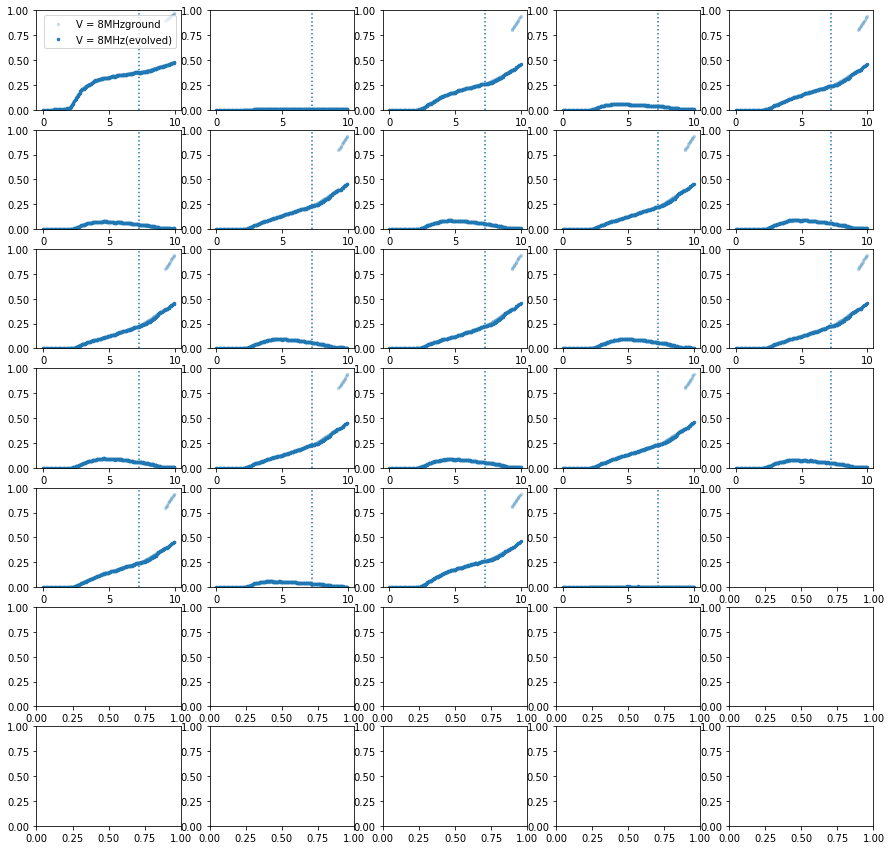

In [12]:
# rydberg state correlation with site m

m = 0
ms = 5
fig, ax = plt.subplots(7, 5, figsize=(15,15))

for i in range(N[0]):
#         print(t[j])
#         print(zzg_list[j][:,m,i])
    label0 ='V = '+ str(int(selected_data[j]['params']['U']))+'MHz'
    ax[i//5,i%5].axvline(t[j][crit_id_list[j]],markersize = ms,ls = ':',color = 'C%d'%j_n)
    ax[i//5,i%5].plot(t[j],zzg_list[j][:,m,i],markersize = ms,marker='.',color = 'C%d'%j_n,ls = '',label= label0+'ground',alpha = 0.2)        
    ax[i//5,i%5].plot(t[j],zz_list[j][:,m,i],markersize = ms,marker='.',color = 'C%d'%j_n,ls = '',label= label0+'(evolved)')
       # ax[i//5,i%5].set_ylim([-0.1,1])
    ax[0,0].legend()
    ax[i//5,i%5].set_ylim([0,1])

[ 0.14442086 -0.1659978 ]
[ 0.14556445 -0.1568192 ]
[ 0.14674623 -0.14780669]
[ 0.14796635 -0.13898673]
[ 0.14922479 -0.13038513]
[ 0.15052136 -0.12202646]
[ 0.15185573 -0.11393371]
[ 0.15322736 -0.10612757]
[ 0.15463572 -0.09862666]
[ 0.1560799  -0.09144549]
[ 0.15755931 -0.08459724]
[ 0.15907313 -0.07809048]
[ 0.16062067 -0.07193094]
[ 0.16220128 -0.06612067]
[ 0.16381444 -0.06065851]
[ 0.16545983 -0.05554023]
[ 0.16713732 -0.05075869]
[ 0.16884701 -0.04630432]
[ 0.17058926 -0.04216541]
[ 0.17236464 -0.03832849]
[ 0.17417404 -0.03477889]
[ 0.17601853 -0.03150099]
[ 0.1778994  -0.02847866]
[ 0.17981816 -0.02569572]
[ 0.18177646 -0.02313608]
[ 0.18377605 -0.02078417]
[ 0.18581876 -0.01862507]
[ 0.18790642 -0.01664468]
[ 0.19004088 -0.01482994]
[ 0.19222391 -0.01316896]
[ 0.19445685 -0.01165022]
[ 0.19674109 -0.01026394]
[ 0.1996271  -0.01020573]
[ 0.20194448 -0.0089123 ]
[ 0.20432034 -0.00773177]
[ 0.20675391 -0.00666065]
[ 0.20924341 -0.0056945 ]
[ 0.21178604 -0.00482898]
[ 0.2143776 

Text(0.53, 1.05, '8.0us Dilila ramp,Rabi = 1.5MHz')

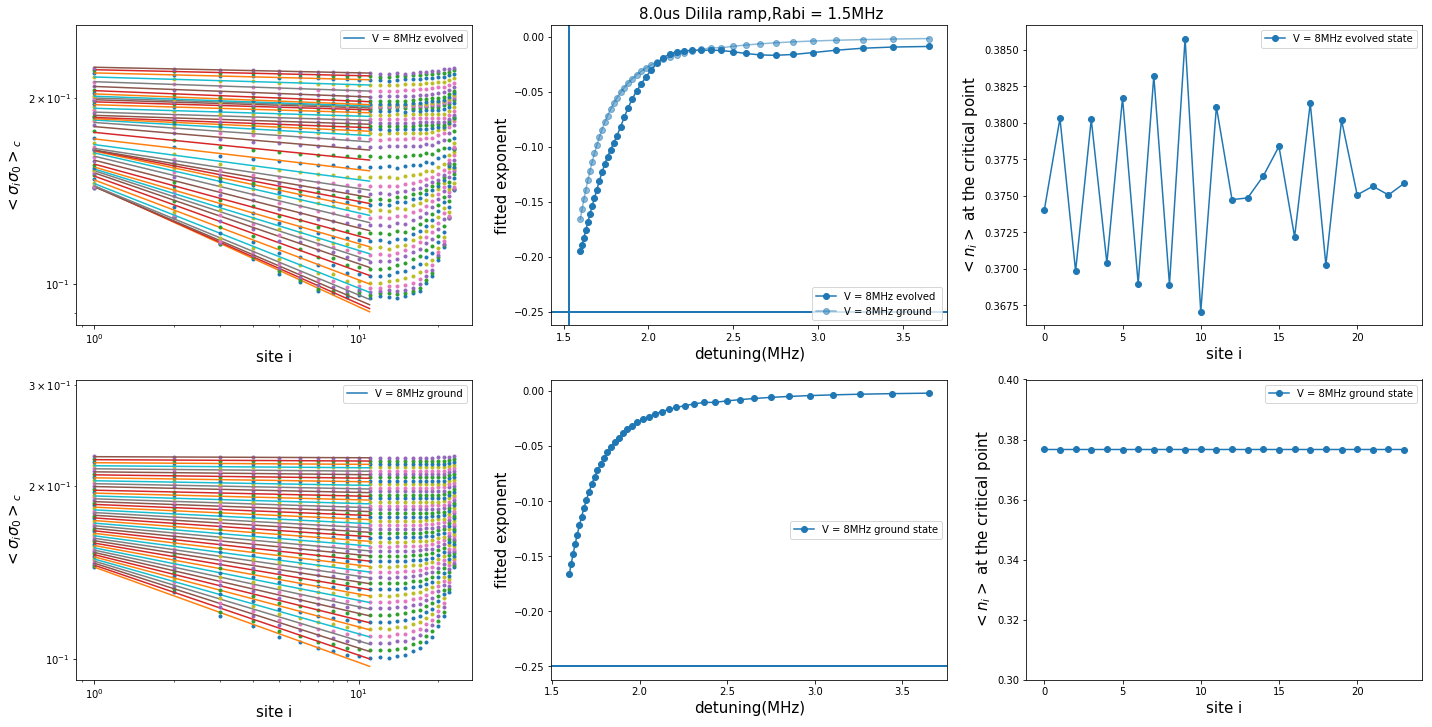

In [14]:
fs = 15
ms = 1
# the detuning range of interest
spacing = 1 # *0.052us
intial_detuning =1.6
final_detuning = 4
def power_law(x, a, b):
    return a * x**b
marker_list = ['s','o','v','^']
exponent_list = []
exponent_g_list = []
fig,ax = plt.subplots(ncols=3,nrows=2,figsize=(20,10))

for i_n,i in enumerate(range(len(N))):
    label0 ='V = '+ str(int(selected_data[i]['params']['U']))+'MHz'

    ax[0,0].plot([],[],label = label0+' evolved',color='C%d'%i_n )
    ax[0,0].legend()
    ax[1,0].plot([],[],label = label0+' ground',color='C%d'%i_n )
    ax[1,0].legend()
    exponent = []
    exponent_g = []
    detuning_list = []
    initial_id = np.argmin(abs(detuning[i]-intial_detuning))
    final_id = np.argmin(abs(detuning[i]-final_detuning))
    #for it,t_id in enumerate(range(crit_id_list[i]-10,crit_id_list[i]+10,1)):
    for it,t_id in enumerate(range(initial_id,final_id,spacing)):

        detuning_list.append(detuning[i][t_id])
        ax[0,0].plot(x_list[i],sigma_2_list[i][t_id],marker = '.',ls = '' )
        ax[1,0].plot(x_list[i],sigma_2_g_list[i][t_id],marker = '.',ls = '')
#         print('aha',detuning[i][t_id])
#         print(sigma_2_list[i][t_id])
        fit_range = int(N[i]/2-2)
        xdata = np.arange(1,fit_range)
        ydata = sigma_2_list[i][t_id,1:fit_range]
        #print(sigma_2_list[i][t_id])
        params, params_covariance= curve_fit(power_law, xdata, ydata)
        xfit = np.linspace(1, fit_range+1, 100)
        yfit = power_law(xfit, params[0], params[1])
        exponent.append(params[1])
        
        xdata_g = np.arange(1,fit_range)
        ydata_g = sigma_2_g_list[i][t_id,1:fit_range]
        params_g, params_g_covariance= curve_fit(power_law, xdata_g, ydata_g)
        print(params_g)
        #print(N[i],detuning[i][t_id],params_g_covariance[1,1]**0.5/params_g[1])
        xfit_g = np.linspace(1, fit_range+1, 100)
        yfit_g = power_law(xfit_g, params_g[0], params_g[1])
        exponent_g.append(params_g[1])
        #print(detuning[i][t_id],params[1])
        ax[1,1].axhline(-0.25)
        ax[0,1].axhline(-0.25)
        ax[0,1].axvline(detuning[i][crit_id_list[i]],color = 'C%d'%i_n)
        ax[0,0].plot(xfit, yfit, '-')
        ax[1,0].plot(xfit_g, yfit_g, '-')

    
        if t_id == crit_id_list[i]:
                ax[0,1].scatter(detuning[i][t_id],params[1],s=200,color='C%d'%i_n,marker = '*',zorder = 2)
                ax[1,1].scatter(detuning[i][t_id],params_g[1],s=200,color='C%d'%i_n,marker = '*',zorder = 2)

    ax[0,2].plot(np.arange(0,N[i]),z_list[i][crit_id_list[i]],color='C%d'%i_n,label= label0+' evolved state',marker = 'o')

    ax[1,2].plot(np.arange(0,N[i]),zg_list[i][crit_id_list[i]],color='C%d'%i_n,label= label0+' ground state',marker = 'o')

               
       
    ax[0,1].plot(detuning_list,exponent,marker = 'o',ls = '-',zorder =1,label= label0+' evolved ')
    ax[0,1].plot(detuning_list,exponent_g,marker = 'o',ls = '-',color='C%d'%i_n,zorder =1,label= label0+' ground ',alpha =0.5)

    ax[1,1].plot(detuning_list,exponent_g,marker = 'o',ls = '-',color='C%d'%i_n,zorder =1,label= label0+' ground state')
       
    ax[0,1].set_xlabel('detuning(MHz)',fontsize = fs)
    ax[0,1].set_ylabel('fitted exponent',fontsize = fs)
    ax[0,1].legend(loc='lower right')
    ax[1,1].set_xlabel('detuning(MHz)',fontsize = fs)
    ax[1,1].set_ylabel('fitted exponent',fontsize = fs)
    ax[1,1].legend()
    exponent_list.append(exponent)
    ax[0,0].set_xlabel('site i',fontsize = fs)
    ax[0,0].set_ylabel('$<\sigma_i\sigma_0>_c$',fontsize = fs)
    ax[1,0].legend()

   #ax[0,2].set_ylim([0.3,0.4])
    ax[0,2].set_xlabel('site i',fontsize = fs)
    ax[0,2].set_ylabel('$<n_i>$ at the critical point',fontsize = fs)
    ax[0,2].legend()

    exponent_g_list.append(exponent_g)
    ax[1,0].set_xlabel('site i',fontsize = fs)
    ax[1,0].set_ylabel('$<\sigma_i\sigma_0>_c$',fontsize = fs)    
    
    ax[1,2].set_ylim([0.3,0.4])
    ax[1,2].set_xlabel('site i',fontsize = fs)
    ax[1,2].set_ylabel('$<n_i>$ at the critical point',fontsize = fs)
    ax[1,2].legend()

    ax[0,0].set_xscale('log')
    ax[0,0].set_yscale('log')    
    ax[1,0].set_xscale('log')
    ax[1,0].set_yscale('log')  
    fig.tight_layout()
title = str(selected_data[0]['params']['T_DiLILA'])+'us Dilila ramp,'+'Rabi = '+str(selected_data[0]['params']['Omega'])+'MHz'

ax[0,1].set_title(title,fontsize=fs,x=0.53,y=1.05)    

# print('Correlatorof the evolved state'+ str(np.round(sigma2,5)))
# print('Correlator of the ground state'+ str(np.round(sigma2_g,5)

24


Text(0.5, 0, 'Detuning(MHz)')

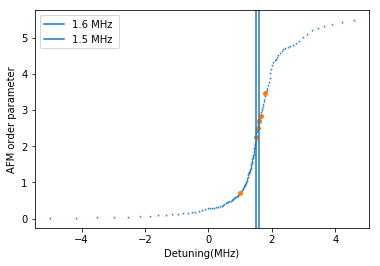

In [14]:
sampled_x = np.arange(0,2.5,0.1)
sampled_y = []

sampled_x = np.array([1,1.5,1.55,1.6,1.65,1.8])
sampled_y = np.array([0.72,2.35,2.5,2.7,2.87,3.5])
for i_n,i in enumerate(range(len(N))):
#for i_n,i in enumerate([0,1,3]):
    print(len(x_list[i]))
    temp = sigma_2_list[i][:]
    x = detuning[i][20:]
    y = np.sum(temp,axis=1)[20:]
    interp_func = interp1d(x, y)

    interp_y = interp_func(sampled_x)
#     sampled_y.append(interp_y)
    plt.plot(x,y,marker = '^',markersize = 1, ls ='')
    plt.plot(sampled_x,interp_y,marker = 'o',markersize = 4,ls ='')
#plt.yscale('log')
plt.axvline(1.6,label = '1.6 MHz')
plt.axvline(1.5,label = '1.5 MHz ')
plt.legend()
sampled_y = np.array(sampled_y)
plt.ylabel('AFM order parameter')
plt.xlabel('Detuning(MHz)')
#plt.ylim([0.1,0.8])

In [15]:
# generate artificial scaling data from master curve
 # with rho_c == 1.0, nu == 2.0, zeta == 0.0
l = N
#l = [N[i] for i in [0,1,3]]
rho = sampled_x
l_mesh, rho_mesh = np.meshgrid(l, rho, indexing='ij')
y = sampled_y
dy = y / 100.
a = y
da = dy
res = fssa.autoscale(l=l, rho=rho, a=a, da=da, rho_c0=1.57, nu0=1., zeta0=1.)
res

ValueError: a should be 2-D array_like

In [ ]:
auto_scaled_data = fssa.scaledata(l, rho, a, da, res.rho, res.nu, res.zeta)
fig, ax = plt.subplots()
for i in range(len(auto_scaled_data.x)):
    ax.plot(auto_scaled_data.x[i,:],auto_scaled_data.y[i,:])

ax.set_xlabel(r'$x$')
plt.show()

In [17]:
def func_logistic(x,x0,A,B):
    return A/(1+np.exp(-(x-x0)/B))

In [22]:
np.exp(-(sampled_x+1)/15)

array([0.87517332, 0.84648172, 0.84366482, 0.84085728, 0.83805909,
       0.82972026])

In [49]:
sampled_x1 = np.array([1.  , 1.5 , 1.6 , 1.65, 1.8 ]) 
exp_data = np.array([0.3693,0.6614,0.6307,0.6745,0.6779,0.7449])
exp_data1 = np.array([0.3693,0.6614,0.6745,0.6779,0.7449])

In [47]:
sampled_x

array([1.  , 1.5 , 1.55, 1.6 , 1.65, 1.8 ])

[0.63012479 1.98923205 2.10916204 2.27031466 2.40522959 2.90402092]
[1.56308244 5.11919998 0.31408741]
[1.53594695 4.13769726 0.31498904]
[1.05023654 0.8039479  0.32004253]


Text(0.5, 0, 'time(us)')

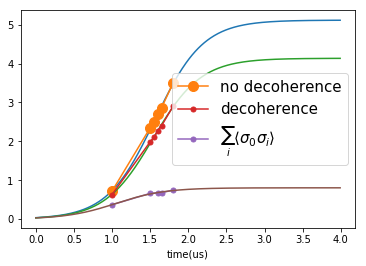

In [50]:
# print(sampled_y)
dec_sampled_y = np.exp(-(sampled_x+1)/15)*sampled_y
print(dec_sampled_y)
p,perr = curve_fit(func_logistic,sampled_x,sampled_y,p0=[1.45,13,0.3])
print(p)
plot_x = np.arange(0,4,0.01)
plt.plot(plot_x,func_logistic(plot_x,*p))
plt.plot(sampled_x,sampled_y,marker = 'o',markersize =10,label = 'no decoherence')
p,perr = curve_fit(func_logistic,sampled_x,dec_sampled_y,p0=[1.45,13,0.3])
print(p)
plot_x = np.arange(0,4,0.01)
plt.plot(plot_x,func_logistic(plot_x,*p))
plt.plot(sampled_x,dec_sampled_y,marker = 'o',markersize =5,label = 'decoherence')
plt.plot(sampled_x1,exp_data1,marker = 'o',markersize =5,label = '$\sum_i \langle \sigma_0 \sigma_i\\rangle$')
p,perr = curve_fit(func_logistic,sampled_x1,exp_data1,p0=[1.45,13,0.3])
print(p)
plot_x = np.arange(0,4,0.01)
plt.plot(plot_x,func_logistic(plot_x,*p))

plt.plot()
#plt.plot(x,y,marker = '^',markersize = 1, ls ='')
plt.legend(fontsize = 15)
plt.xlabel('time(us)')

In [39]:
for i_n,i in enumerate(range(len(N))):
#for i_n,i in enumerate([0,1,3]):
    print(len(x_list[i]))
    temp = sigma_2_list[i][:,1:]
    print(np.shape(temp))
    x = detuning[i][20:]
    y = np.sum(temp,axis=1)[20:]

24
(174, 23)
[4.70401482e-04 3.45479343e-04 1.51983857e-03 2.72450963e-03
 3.90914863e-03 6.09425559e-03 8.16182323e-03 1.09914427e-02
 1.71081378e-02 2.59578798e-02 3.27174838e-02 3.90454225e-02
 4.24395976e-02 4.58723635e-02 5.29306700e-02 6.43954489e-02
 8.27001666e-02 1.00667562e-01 1.17839895e-01 1.27100649e-01
 1.33508510e-01 1.35306424e-01 1.40683283e-01 1.47426755e-01
 1.61270050e-01 1.77247131e-01 1.98681001e-01 2.19188551e-01
 2.41161139e-01 2.58998771e-01 2.76071996e-01 2.89594687e-01
 3.03597875e-01 3.17182014e-01 3.31977621e-01 3.47497794e-01
 3.62297377e-01 3.77835475e-01 3.91550646e-01 4.07736736e-01
 4.23080441e-01 4.42687886e-01 4.62215866e-01 4.85317537e-01
 5.07826302e-01 5.31111169e-01 5.53616660e-01 5.75003122e-01
 5.97749784e-01 6.19770072e-01 6.45344050e-01 6.69846130e-01
 6.96368607e-01 7.20213052e-01 7.43472795e-01 7.66077004e-01
 7.89808844e-01 8.19364298e-01 8.52867682e-01 8.93597133e-01
 9.34013744e-01 9.73738563e-01 1.00654807e+00 1.03250520e+00
 1.05333238

In [ ]:
#run options 
#     'run_options' : {
#         'dirc': '/n/home03/bye/tenpy_squeezing/workfolder_yu/output_cluster/',
#         'L' : ['24'],
#         'Omega' : ['1.5','2'],
#         'U' : ['6','8','10','15.'],
#         'chi': '128',
#         'N_steps': '1',
#         'Rabi_ramp_time': '2',
#         'Rabi_ramp_dt': '0.1',
#         'T_DiLILA':['6','8','12','18'],
#         'Gap_init':'5.',
#         'Gap_crit':'0.28',
#         'Gap_final':'3.64',
#         'Delta_ini': '-5.',
#         'Delta_crit': '1.6',
#         'Delta_fin': '5.',
#         'tinflect': '5.28',
#         'auto_tinflect': '1.',
#         'dt': '0.052',

In [63]:
t[0],detuning[0]

array([0.   , 0.1  , 0.2  , 0.3  , 0.4  , 0.5  , 0.6  , 0.7  , 0.8  ,
       0.9  , 1.   , 1.1  , 1.2  , 1.3  , 1.4  , 1.5  , 1.6  , 1.7  ,
       1.8  , 1.9  , 2.   , 2.052, 2.104, 2.156, 2.208, 2.26 , 2.312,
       2.364, 2.416, 2.468, 2.52 , 2.572, 2.624, 2.676, 2.728, 2.78 ,
       2.832, 2.884, 2.936, 2.988, 3.04 , 3.092, 3.144, 3.196, 3.248,
       3.3  , 3.352, 3.404, 3.456, 3.508, 3.56 , 3.612, 3.664, 3.716,
       3.768, 3.82 , 3.872, 3.924, 3.976, 4.028, 4.08 , 4.132, 4.184,
       4.236, 4.288, 4.34 , 4.392, 4.444, 4.496, 4.548, 4.6  , 4.652,
       4.704, 4.756, 4.808, 4.86 , 4.912, 4.964, 5.016, 5.068, 5.12 ,
       5.172, 5.224, 5.276, 5.328, 5.38 , 5.432, 5.484, 5.536, 5.588,
       5.64 , 5.692, 5.744, 5.796, 5.848, 5.9  , 5.952, 6.004, 6.056,
       6.108, 6.16 , 6.212, 6.264, 6.316, 6.368, 6.42 , 6.472, 6.524,
       6.576, 6.628, 6.68 , 6.732, 6.784, 6.836, 6.888, 6.94 , 6.992,
       7.044, 7.096, 7.148, 7.2  , 7.252, 7.304, 7.356, 7.408, 7.46 ,
       7.512, 7.564,

In [68]:
sigma_2_list[0]

array([[ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [ 2.24783314e-04,  4.43145484e-08, -2.61281099e-09, ...,
         7.78179473e-15, -7.85088127e-15,  5.71572845e-15],
       ...,
       [ 2.49327125e-01,  2.25714206e-01,  2.25071067e-01, ...,
         2.24368421e-01,  2.24591009e-01,  2.25600422e-01],
       [ 2.49454834e-01,  2.28222327e-01,  2.27480647e-01, ...,
         2.26500038e-01,  2.26958240e-01,  2.28014831e-01],
       [ 2.49581647e-01,  2.31159095e-01,  2.29873911e-01, ...,
         2.28791691e-01,  2.29796873e-01,  2.30734008e-01]])

In [69]:
sigma_1_list[0]

[array([-0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,
         0., -0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,  0.]),
 array([-0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,
         0., -0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,  0.]),
 array([ 4.51554150e-08,  4.10258706e-09, -4.11508082e-09,  4.11323806e-09,
        -4.11334515e-09,  4.11334669e-09, -4.11334726e-09,  4.11334728e-09,
        -4.11334730e-09,  4.11334734e-09, -4.11334747e-09,  4.11334789e-09,
        -4.11334925e-09,  4.11335368e-09, -4.11336783e-09,  4.11341201e-09,
        -4.11354411e-09,  4.11390177e-09, -4.11459659e-09,  4.11430388e-09,
        -4.10778911e-09,  4.07920630e-09, -4.06607375e-09, -4.52451656e-08]),
 array([ 1.02972442e-07,  9.33012923e-09, -9.31667506e-09,  9.34349899e-09,
        -9.34946161e-09,  9.34958788e-09, -9.34918012e-09,  9.34897620e-09,
        -9.34889966e-09,  9.34887734e-09, -9.34886970e-09,  9.34886824e-09,
        -9.34886592e-09,  9.34886144e-

In [79]:
np.shape(np.array([t[0].T,sigma_2_list[0]]))
#np.writetxt('')

C:\Users\wangy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


ValueError: could not broadcast input array from shape (174,24) into shape (174,)

In [105]:
ramp = np.array(np.array([t[0],detuning[0]]))
np.savetxt('ramp.txt',ramp)

In [87]:
np.shape(np.array([t[0],detuning[0]]).T)

(174, 2)

In [106]:
np.shape(sigma_2_list[0])
np.savetxt('sigma2_evolved.txt',sigma_2_list[0])

In [107]:
np.savetxt('sigma2_ground.txt',sigma_2_g_list[0])

In [7]:
detuning[i],(E[i][:,2]-E[i][:,0])/2/np.pi

(array([-5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -4.16176334, -3.50261872, -2.97071033, -2.53243987,
        -2.16508147, -1.85271288, -1.58384677, -1.34998708, -1.14471492,
        -0.96309032, -0.8012495 , -0.65612694, -0.52525937, -0.40664477,
        -0.29863924, -0.19988039, -0.10922949, -0.02572745,  0.05143931,
         0.12296542,  0.18944755,  0.25140107,  0.30927346,  0.36345512,
         0.4142882 ,  0.46207382,  0.50707805,  0.54953686,  0.58966027,
         0.62763579,  0.66363142,  0.69779804,  0.7302716 ,  0.76117492,
         0.79061918,  0.81870535,  0.84552526,  0.87116266,  0.89569407,
         0.91918955,  0.94171335,  0.96332454,  0.98407748,  1.00402229,
         1.02320529,  1.04166929,  1.05945399,  1.0